<a href="https://colab.research.google.com/github/107711/Talento-tech/blob/main/PROYECTO_HONGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

Attribute Information: (classes: edible=e, poisonous=p)//clase

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s// forma del sombrero

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s//superficie o textura del sombrero

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y//color del sombrero

bruises: bruises=t,no=f//manchas

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s//olor

gill-attachment: attached=a,descending=d,free=f,notched=n // esctructura de las lamela

gill-spacing: close=c,crowded=w,distant=d// espacioamiento entre lamelas

gill-size: broad=b,narrow=n// tamaño de las lamelas

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y//color de la lamela

stalk-shape: enlarging=e,tapering=t// forma del tallo

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?//raiz del tallo

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s// textura o superficie del tallo encima del anillo

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s// tallo debajo del anillo

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y// color del tallo encima del anillo

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y// color debajo del anillo

veil-type: partial=p,universal=u// tipo de velo

veil-color: brown=n,orange=o,white=w,yellow=y// color del velo

ring-number: none=n,one=o,two=t//numero de anillos

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z //tipo de anillo

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y// color de la espora

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y//población

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d //habitat






In [4]:
df= pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()#revisión de los datos nulos, tipo de datos y cantidad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [6]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<Axes: xlabel='veil-type'>

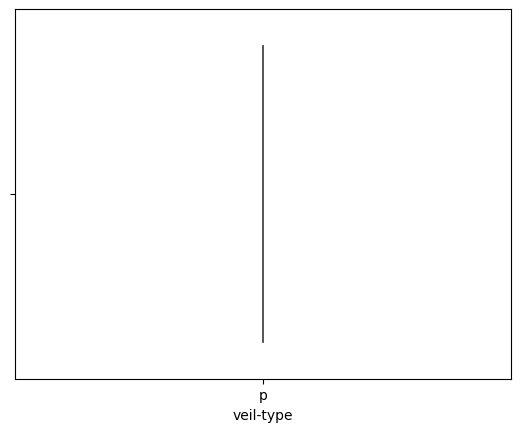

In [8]:
#graficar para encontrar outliers
sns.violinplot(x=df["veil-type"])#veil-type presenta un comportamiento atípico

[4040, 1712, 1248, 400, 384, 340]


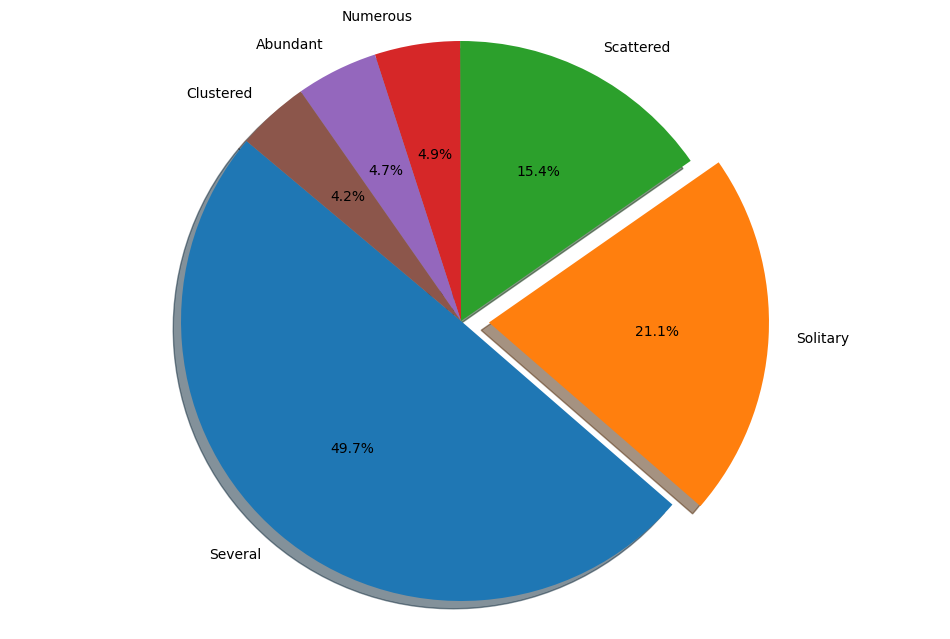

In [9]:
populations = df['population'].value_counts()
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist()
print(pop_size)
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
explode = (0, 0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=(12,8))
plt.pie(pop_size, labels=pop_labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [11]:
#df['class'] = pd.to_numeric(df['class'],errors='coerce')
df["class"] = [1 if i == "p" else 0 for i in df["class"]]

In [12]:
df['class']

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [13]:
num_zeros = (df['class'] == 0).sum()
print("Number of zeros:", num_zeros)

# Count the number of 1s in the 'class' column
num_ones = (df['class'] == 1).sum()
print("Number of ones:", num_ones)

Number of zeros: 4208
Number of ones: 3916


In [14]:
df.describe()

,class
count,8124.000000
mean,0.482029
std,0.499708
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
df.drop('veil-type',axis=1,inplace=True)#eliminar veil-type pues no influye en la predicción

In [16]:
#convertir los datos a valores numéricos
for column in df.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(df[column].unique())-1)
    for i in df[column].unique():
        df[column] = [value if letter == i else letter for letter in df[column]]
        value += step

In [17]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667
5,0,0.0,0.333333,0.111111,0.0,0.125,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.2,0.166667
6,0,0.2,0.000000,0.222222,0.0,0.125,0.0,0.0,1.0,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.2,0.333333
7,0,0.2,0.333333,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.0,0.333333
8,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.6,0.166667
9,0,0.2,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.333333


In [18]:
# Ubicar las variables en una lista
lista_variables=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [19]:
df_modelo=df[lista_variables]
df_modelo.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667


In [20]:
X=df_modelo[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']]

In [22]:
#definir la variable a predecir
Y=df_modelo['class']

In [23]:
Y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [24]:
X.corr().head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.057205,0.001839,0.120509,0.175229,0.040082,-0.043906,0.218627,0.126006,0.210858,0.079050,0.074161,0.073171,0.056450,0.042988,0.058422,0.099599,0.219476,0.139616,0.169343
cap-surface,-0.057205,1.000000,0.016133,-0.047265,-0.106147,-0.186157,0.029686,-0.266708,-0.050834,-0.224336,0.080111,0.090350,0.080218,0.092631,-0.171918,-0.074779,0.107866,-0.283378,0.185359,-0.089972
cap-color,0.001839,0.016133,1.000000,-0.065879,0.115960,-0.163457,-0.012795,0.023458,0.045698,0.067869,-0.020976,-0.042124,-0.063978,-0.065686,-0.172176,0.184474,0.040785,0.055050,0.070150,0.003142
bruises,0.120509,-0.047265,-0.065879,1.000000,0.588456,0.137359,0.299473,0.325408,-0.099364,0.267125,0.573538,0.530214,0.267325,0.208451,0.125606,-0.014367,0.685119,0.543409,-0.008293,0.185130
odor,0.175229,-0.106147,0.115960,0.588456,1.000000,-0.016816,-0.155748,0.599497,0.324774,0.572311,0.394828,0.353683,0.214888,0.101501,-0.056362,-0.009788,0.460625,0.563857,0.277777,0.449061


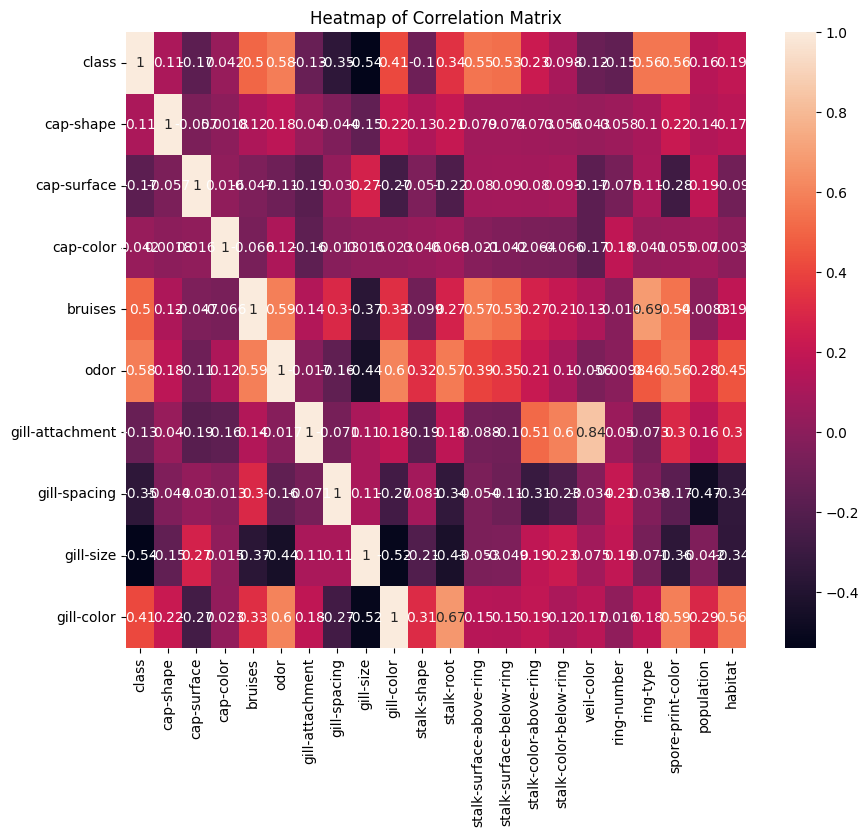

In [25]:
#matriz de correlación
sns.heatmap(df_modelo.corr().head(10), annot=True).set_title('Heatmap of Correlation Matrix')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [26]:
X=sm.add_constant(X)#añadir intercepto de referencia

In [27]:
modelo1=sm.GLM(Y,X,family=sm.families.Binomial())#configurar el modelo para predecir a partir de una variable independiente(Y) y otra dependiente(Y)

In [28]:
modelo1_fit=modelo1.fit()

In [29]:
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  class   No. Observations:                 8124
Model:                            GLM   Df Residuals:                     8103
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1379.2
Date:                Sun, 18 Aug 2024   Deviance:                       2758.4
Time:                        02:59:05   Pearson chi2:                 3.93e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6485
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4868      0.147    -16.913      0.000      -2.775      -2.199
cap-shape                    0.4583      0.183      2.510      0.012       0.100       0.816
cap-surface                 -2.6712      0.242    -11.035      0.000      -3.146      -2.197
cap-color                    0.0281      0.264      0.107      0.915      -0.489       0.546
bruises                     -0.3363      0.211     -1.595      0.111      -0.750       0.077
odor                        10.6902      0.520     20.540      0.000       9.670      11.710
gill-attachment             -5.4729      0.569     -9.617      0.000      -6.588      -4.358
gill-spacing                -2.5624      0.194    -13.200      0.000      -2.943      -2.182
gill-color                   4.9874      0.382     13.054      0.000       4.239       5.736
stalk-shape                 -3.4821      0.173    -20.096      0.000      -3.822      -3.143
stalk-root                  -5.7506      0.318    -18.074      0.000      -6.374      -5.127
stalk-surface-above-ring     3.0081      0.352      8.549      0.000       2.318       3.698
stalk-surface-below-ring     1.3574      0.226      6.010      0.000       0.915       1.800
stalk-color-above-ring       2.1392      0.530      4.035      0.000       1.100       3.178
stalk-color-below-ring      -3.8436      0.509     -7.545      0.000      -4.842      -2.845
veil-color                  -8.0252      0.993     -8.084      0.000      -9.971      -6.080
ring-number                -10.4300      0.533    -19.578      0.000     -11.474      -9.386
ring-type                   -0.7024      0.406     -1.731      0.083      -1.498       0.093
spore-print-color           10.7333      0.490     21.904      0.000       9.773      11.694
population                  -0.1269      0.222     -0.572      0.567      -0.561       0.308
habitat                     -1.0402      0.320     -3.254      0.001      -1.667      -0.414
============================================================================================
"""

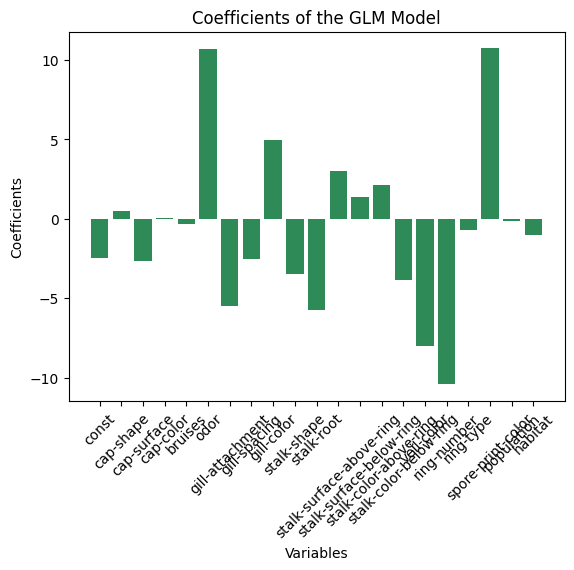

In [30]:
#vizualizar el impacto de cada variable y su dirección
plt.bar(modelo1_fit.params.index, modelo1_fit.params.values,color="#2E8B57")
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients of the GLM Model')
plt.xticks(rotation=45)
plt.show()


In [31]:
ratio=np.exp(modelo1_fit.params)
ratio

,0
const,0.083172
cap-shape,1.581326
cap-surface,0.069168
cap-color,1.028543
bruises,0.714421
odor,43925.010886
gill-attachment,0.004199
gill-spacing,0.077116
gill-color,146.548850
stalk-shape,0.030741


In [32]:
coefficients = modelo1_fit.params
print(coefficients)

const                       -2.486850
cap-shape                    0.458264
cap-surface                 -2.671218
cap-color                    0.028143
bruises                     -0.336284
odor                        10.690239
gill-attachment             -5.472924
gill-spacing                -2.562446
gill-color                   4.987359
stalk-shape                 -3.482145
stalk-root                  -5.750647
stalk-surface-above-ring     3.008132
stalk-surface-below-ring     1.357404
stalk-color-above-ring       2.139152
stalk-color-below-ring      -3.843586
veil-color                  -8.025178
ring-number                -10.429963
ring-type                   -0.702445
spore-print-color           10.733314
population                  -0.126880
habitat                     -1.040247
dtype: float64


In [33]:
probabilidad=ratio/(1+ratio)# convertir el odds ratio en probabilidad con valores entre 1 y 0

Text(0, 0.5, 'Odds Ratio')

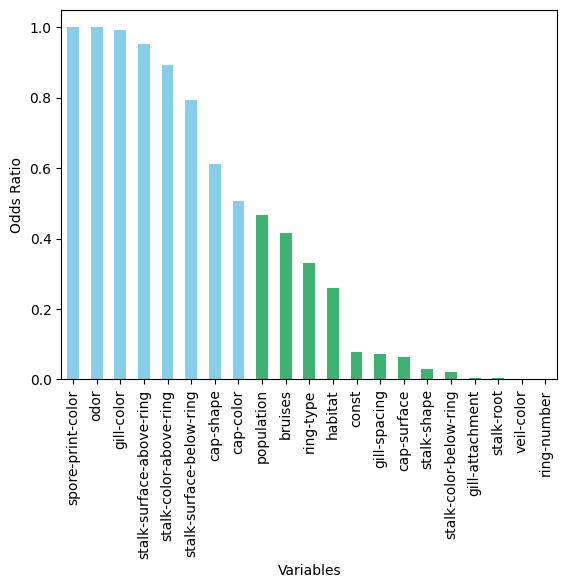

In [34]:
# gráfica de probabilidad
colors = ['#87CEEB','#87CEEB','#87CEEB','#87CEEB','#87CEEB','#87CEEB','#87CEEB','#87CEEB','#3CB371','#3CB371',
          '#3CB371','#3CB371','#3CB371','#3CB371','#3CB371','#3CB371','#3CB371','#3CB371','#3CB371', '#3CB371'
          ]
probabilidad.sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xlabel('Variables')
plt.ylabel('Odds Ratio')



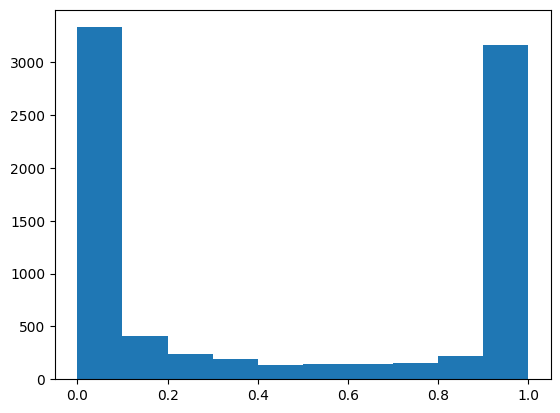

In [49]:
predicciones=modelo1_fit.predict(X)
plt.hist(predicciones);

In [50]:
df_modelo['class_predict']=np.where(predicciones<0.5,0,1)

In [51]:
#matriz de confusión
pd.crosstab(df_modelo['class'],df_modelo['class_predict'])


class_predict,0,1
class,,
0,3955,253
1,342,3574


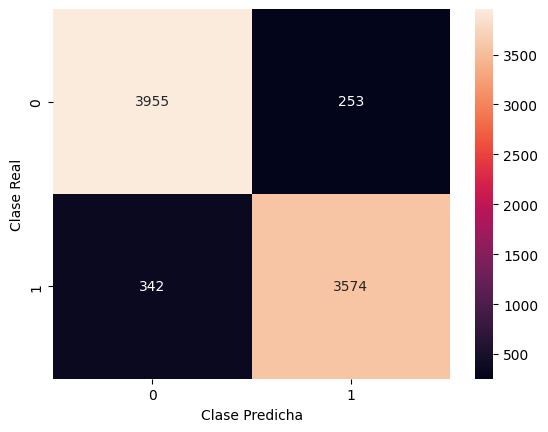

In [46]:
#visualizar matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix = pd.crosstab(df_modelo['class'], df_modelo['class_predict'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [47]:
# Evaluar el modelo
print("Evaluación de Regresión Logística:")
print("Precisión:", precision_score(df_modelo['class_predict'],df_modelo['class']))
print("Recall:", recall_score(df_modelo['class_predict'],df_modelo['class']))
print("F1-Score:", f1_score(df_modelo['class_predict'],df_modelo['class']))
print("Accuracy:", accuracy_score(df_modelo['class_predict'],df_modelo['class']))

Evaluación de Regresión Logística:
Precisión: 0.9126659856996936
Recall: 0.9338907760648028
F1-Score: 0.9231563993284256
Accuracy: 0.9267602166420482
